# Title & Introduction
**Project Title**: Exploratory Data Analysis of Bitcoin Price (2025)

**Objective**:
The purpose of this internship project is to perform Exploratory Data Analysis (EDA) on Bitcoin historical price data from January 2025 to November 2025, understand market trends, identify patterns in volatility, and extract insights that can support further machine learning forecasting.

**Dataset Description**:
The dataset contains the following fields:

Date

Open Price

High Price

Low Price

Close Price

Trading Volume

This dataset helps analyze how Bitcoin price fluctuates over time and how trading volume impacts price movement.

# Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')


# Load and Clean Data

In [24]:
df = pd.read_csv(r"/content/BTC_1Jan2025_to_30Nov2025 (1).csv" , skiprows=2)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns",None)
# Rename Columns
df.columns=['Date','Close','High','Low','Open','Volume']
print(df.columns)
#Convert datatype
df['Date']=pd.to_datetime(df['Date'])
for col in df.columns:
  df[col]=pd.to_numeric(df[col],errors='coerce')
  #Remove  missing values
df=  df.dropna()
print(df.head())
  # sort by date
df=df.sort_values('Date').reset_index(drop=True)
print(df.head())

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
                  Date         Close          High           Low  \
0  1735689600000000000  94419.757812  94929.867188  92788.125000   
1  1735776000000000000  96886.875000  97739.820312  94201.570312   
2  1735862400000000000  98107.429688  98956.914062  96034.617188   
3  1735948800000000000  98236.226562  98734.429688  97562.976562   
4  1736035200000000000  98314.960938  98813.304688  97291.765625   

           Open       Volume  
0  93425.101562  24519888919  
1  94416.289062  46009564411  
2  96881.726562  35611391163  
3  98106.992188  22342608078  
4  98233.906250  20525254825  
                  Date         Close          High           Low  \
0  1735689600000000000  94419.757812  94929.867188  92788.125000   
1  1735776000000000000  96886.875000  97739.820312  94201.570312   
2  1735862400000000000  98107.429688  98956.914062  96034.617188   
3  1735948800000000000  98236.226562  98734.429688  97562.9

Data Cleaning Summary
- Removed extra header rows
- Converted Date column into datetime format
- Converted all price & volume columns into numeric format
- Removed missing values
- Sorted the dataset by Date

# data quality

In [26]:
#mssing value count
print(df.isnull().sum())
print(df.duplicated().sum())

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
0


# Summary Statistics

In [17]:
df.describe()


,Date,Close,High,Low,Open,Volume
count,3.340000e+02,334.000000,334.000000,334.000000,334.000000,3.340000e+02
mean,1.750075e+18,102822.094522,104394.507017,101084.750632,102829.856170,5.348414e+10
std,8.342933e+15,11582.740636,11455.802862,11764.178422,11575.375691,2.428231e+10
min,1.735690e+18,76271.953125,80823.890625,74436.679688,76273.562500,9.863214e+09
25%,1.742882e+18,94529.041016,95787.207031,93081.939453,94530.687500,3.675181e+10
50%,1.750075e+18,104705.488281,106169.824219,103136.796875,104707.140625,5.049687e+10
75%,1.757268e+18,111710.728516,113444.990234,110227.955078,111708.451172,6.788239e+10
max,1.764461e+18,124752.531250,126198.070312,123196.046875,124752.140625,1.817464e+11


# Price Trade Analysis

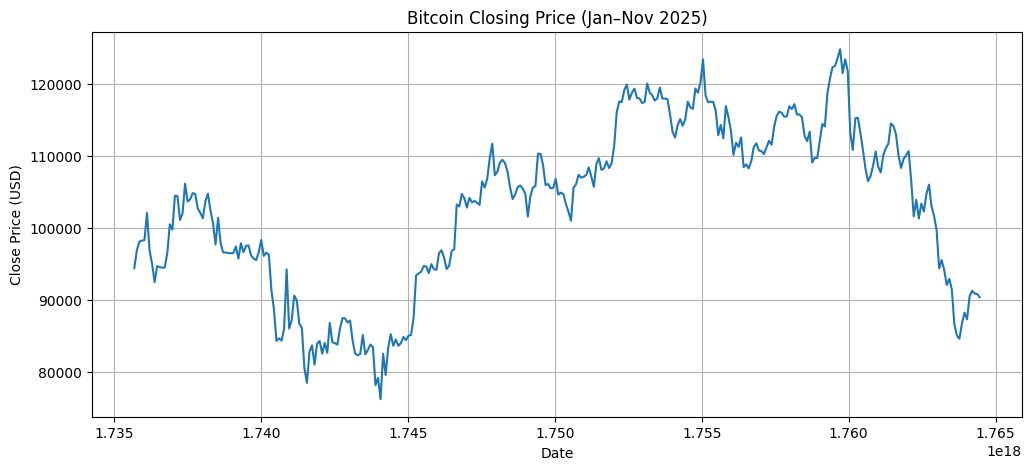

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'])
plt.title("Bitcoin Closing Price (Jan–Nov 2025)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()


# Daily Returns & Volatility

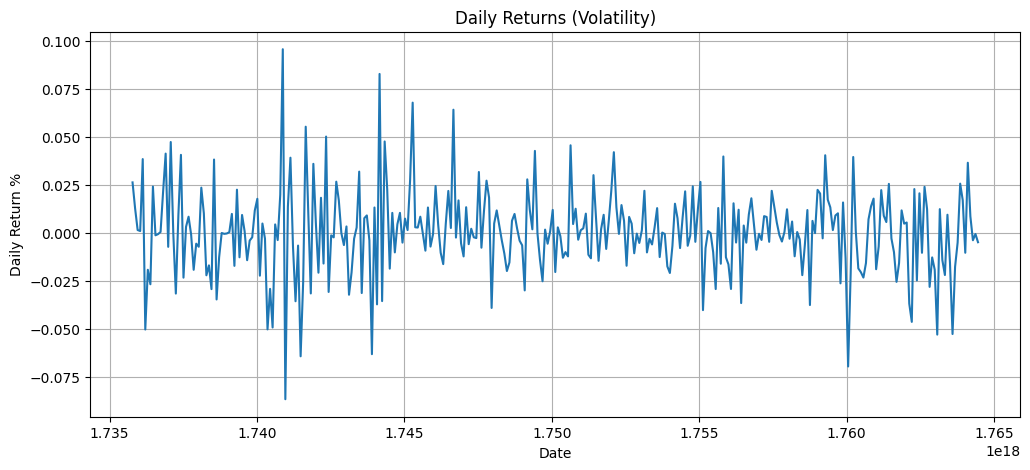

,Daily_Return
count,333.000000
mean,0.000114
std,0.022188
min,-0.086820
25%,-0.011535
50%,-0.000229
75%,0.011732
max,0.095505


In [20]:
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Daily_Return'])
plt.title("Daily Returns (Volatility)")
plt.xlabel("Date")
plt.ylabel("Daily Return %")
plt.grid(True)
plt.show()

df['Daily_Return'].describe()

#Volume vs Price

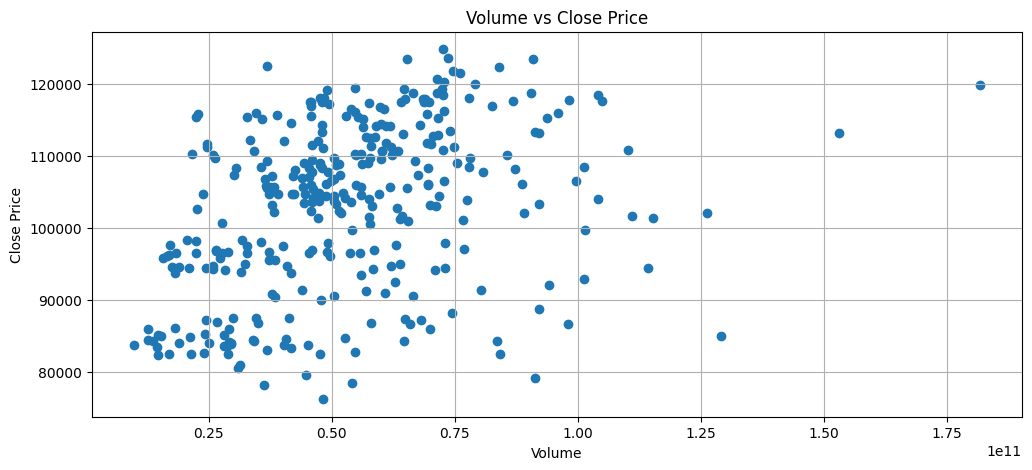

In [21]:
plt.figure(figsize=(12,5))
plt.scatter(df['Volume'], df['Close'])
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


# Price vs Volume Trends

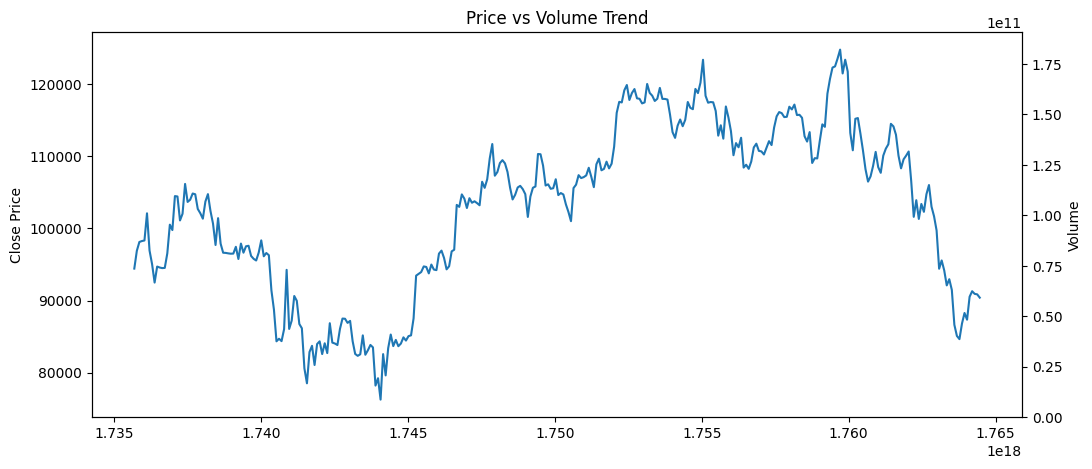

In [22]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(df['Date'], df['Close'], label='Close Price')
ax1.set_ylabel("Close Price")
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], color='gray', alpha=0.3, label='Volume')
ax2.set_ylabel("Volume")
plt.title("Price vs Volume Trend")
plt.show()


#Correlation heat Map

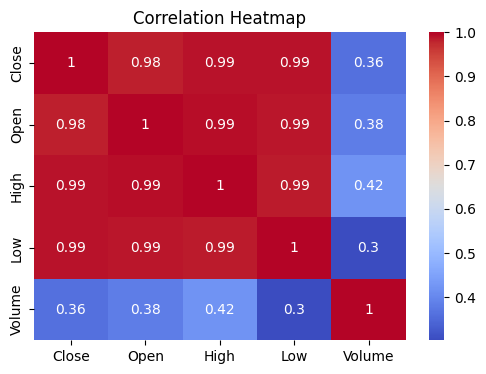

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Close','Open','High','Low','Volume']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


#Final  Summary

- Bitcoin shows **strong volatility** with rapid price cycles  
- The major decline in **March** and peak in **July–August** reflect **speculative market behavior**  
- Daily returns reveal **high-risk trading days**, especially during reversals  
- Volume spikes align with **trend changes** — both bullish and bearish  
- Correlation analysis shows price values carry **similar information**, while **Volume acts as a trend signal**

###  Conclusion
The Bitcoin market in 2025 was **highly reactive**, influenced by sentiment and mass market activity.  
These insights can support forecasting efforts, trading strategies, and feature selection for ML models.

===============================================================================================


##  Future Work

- Build a **forecasting model** using returns & volume
- Analyze **external events** causing the March crash
- Backtest trading strategies using these insights

> Since an LSTM model is already implemented, the focus of this project is **EDA quality, insights, and market understanding**, not repeating the ML part.
